In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import datetime
from sklearn.ensemble import RandomForestRegressor
sns.set()

import statsmodels.api as sm
%matplotlib inline

# 設定
import warnings
warnings.filterwarnings("ignore")

from fbprophet import Prophet
import math

Importing plotly failed. Interactive plots will not work.


In [3]:
item=pd.read_csv("/Users/tasuke0630/making/DataScience/kaggle/future_sales/items.csv")
item_categories=pd.read_csv("/Users/tasuke0630/making/DataScience/kaggle/future_sales/item_categories.csv")
sales_train=pd.read_csv("/Users/tasuke0630/making/DataScience/kaggle/future_sales/sales_train.csv")
shops=pd.read_csv("/Users/tasuke0630/making/DataScience/kaggle/future_sales/shops.csv")
test_csv=pd.read_csv("/Users/tasuke0630/making/DataScience/kaggle/future_sales/test.csv")
sample_submission=pd.read_csv("/Users/tasuke0630/making/DataScience/kaggle/future_sales/sample_submission.csv")

In [4]:
# 日付カラムを正しくフォーマットする
sales_train.date=sales_train.date.apply(lambda x:datetime.datetime.strptime(x, '%d.%m.%Y'))
# 確認
print(sales_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype         
---  ------          -----         
 0   date            datetime64[ns]
 1   date_block_num  int64         
 2   shop_id         int64         
 3   item_id         int64         
 4   item_price      float64       
 5   item_cnt_day    float64       
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 134.4 MB
None


In [5]:
#各月のshopで売れたアイテムの総数
monthly_shop_sales=sales_train.groupby(["date_block_num","shop_id"])["item_cnt_day"].sum()
# get the shops to the columns
monthly_shop_sales=monthly_shop_sales.unstack(level=1)
monthly_shop_sales=monthly_shop_sales.fillna(0)
dates=pd.date_range(start = '2013-01-01',end='2015-10-01', freq = 'MS')
monthly_shop_sales.index=dates
monthly_shop_sales=monthly_shop_sales.reset_index()
monthly_shop_sales.head()

shop_id,index,0,1,2,3,4,5,6,7,8,...,50,51,52,53,54,55,56,57,58,59
0,2013-01-01,5578.0,2947.0,1146.0,767.0,2114.0,0.0,3686.0,2495.0,1463.0,...,3406.0,2748.0,1812.0,2055.0,9386.0,0.0,3238.0,0.0,0.0,2017.0
1,2013-02-01,6127.0,3364.0,488.0,798.0,2025.0,877.0,4007.0,2513.0,1156.0,...,3054.0,2284.0,1737.0,1906.0,8075.0,0.0,2655.0,0.0,0.0,1897.0
2,2013-03-01,0.0,0.0,753.0,959.0,2060.0,1355.0,4519.0,2460.0,977.0,...,3610.0,2605.0,2034.0,2365.0,9488.0,0.0,3099.0,6586.0,3773.0,2028.0
3,2013-04-01,0.0,0.0,583.0,647.0,285.0,1008.0,3168.0,1540.0,-1.0,...,2740.0,1945.0,1446.0,1515.0,6726.0,0.0,2153.0,5493.0,2831.0,1388.0
4,2013-05-01,0.0,0.0,553.0,710.0,1211.0,1110.0,3022.0,1647.0,0.0,...,2839.0,2243.0,1482.0,1767.0,7006.0,852.0,2140.0,5233.0,2308.0,1374.0


In [6]:
# Calculating the base forecasts using prophet
# From HTSprophet pachage -- https://github.com/CollinRooney12/htsprophet/blob/master/htsprophet/hts.py
forecastsDict = {}
for node in range(60):
    # take the date-column and the col to be forecasted
    nodeToForecast = pd.concat([monthly_shop_sales.iloc[:,0], monthly_shop_sales.iloc[:, node+1]], axis = 1)
#     print(nodeToForecast.head())  # just to check
# rename for prophet compatability
    nodeToForecast = nodeToForecast.rename(columns = {nodeToForecast.columns[0] : 'ds'})
    nodeToForecast = nodeToForecast.rename(columns = {nodeToForecast.columns[1] : 'y'})
    growth = 'linear'
    m = Prophet(growth, yearly_seasonality=True)
    m.fit(nodeToForecast)
    future = m.make_future_dataframe(periods = 1, freq = 'MS')
    forecastsDict[node] = m.predict(future)


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

In [7]:
#predictions = np.zeros([len(forecastsDict[0].yhat),1]) 
nCols = len(list(forecastsDict.keys()))+1
for key in range(0, nCols-1):
    f1 = np.array(forecastsDict[key].yhat)
    f2 = f1[:, np.newaxis]
    if key==0:
        predictions=f2.copy()
       # print(predictions.shape)
    else:
        predictions= np.concatenate((predictions, f2), axis = 1)

In [8]:
x=pd.DataFrame(predictions)
x

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,3912.117261,2060.580211,1130.005652,812.074980,2008.221319,452.744107,3671.375082,2459.153950,1009.517982,-2.083401,...,3516.848376,2656.603194,1875.083766,2045.879013,10352.470224,-168.956669,3333.523450,1718.427626,942.887695,1998.389795
1,4145.889330,2285.427046,593.177881,841.379504,1938.718392,1129.240937,4003.835066,2539.788455,672.466903,96.936694,...,3385.269474,2217.499839,1836.896327,1911.905779,9089.275166,359.627647,2769.232165,2163.725261,1171.474567,1936.569222
2,-770.847043,-417.690880,833.837272,1035.684781,1973.787914,1556.924530,4497.240000,2470.421118,556.070814,158.358337,...,4001.723062,2571.151053,2148.970658,2363.817337,10129.114808,76.244567,3141.354443,7533.521154,4237.309715,2083.352223
3,-313.766306,-170.851165,570.517302,611.885227,498.908669,1050.398086,3360.934530,1589.335738,-123.353966,150.026097,...,3087.352034,2003.960084,1468.565345,1530.799582,7526.099077,-305.391584,2120.330136,5999.952057,3082.159528,1479.584642
4,129.506056,68.942825,557.220162,675.412828,1337.973222,1110.962660,3109.346929,1703.596716,10.043212,104.709990,...,3049.713803,2166.109585,1533.040000,1792.525905,7422.915846,360.625037,2161.036921,5204.786091,2284.154207,1447.330778
5,523.080550,282.187933,794.718064,750.248164,1530.079610,1330.559799,3848.358309,2134.751271,135.554458,26.533558,...,3726.609312,2183.562930,1729.084163,2143.734291,8104.341311,210.177029,3083.159683,5338.621097,2579.736025,1677.361728
6,756.106063,408.853874,736.052458,692.647282,1400.830726,1212.781771,3370.373055,2008.274703,218.120509,-61.887810,...,3109.865353,2279.060628,1559.913528,2004.072504,6907.856027,335.242131,3159.106965,4943.283893,2568.771518,1634.885998
7,776.834050,420.773952,819.082114,869.945826,1744.654081,1418.865530,3632.953792,2390.749169,238.981897,-141.375301,...,3402.303008,2159.494050,1737.604936,2327.388843,7761.608798,494.612813,3373.297020,4462.847357,2496.777779,1874.878712
8,662.339138,359.429690,905.766850,1004.182107,1516.117220,1247.314878,4086.122491,2488.229039,218.227825,-206.270028,...,3197.451592,1918.876154,1947.124895,2385.667839,7594.590640,144.184713,2684.963372,4433.908732,2353.522065,1844.371157
9,364.019535,198.386516,831.808718,799.696658,1468.120142,1232.947157,3567.990030,2186.814089,137.111470,6740.874731,...,2986.462929,1947.366145,1846.848418,2235.689659,6902.631329,1947.337201,2330.347356,5151.559308,2712.226089,1671.974986


In [9]:
#34月目に売れた総数
sum_x=[0*i for i in range(35)]
for i in range(35):
    for j in range(60):
        sum_x[i]+=x.loc[i,j]


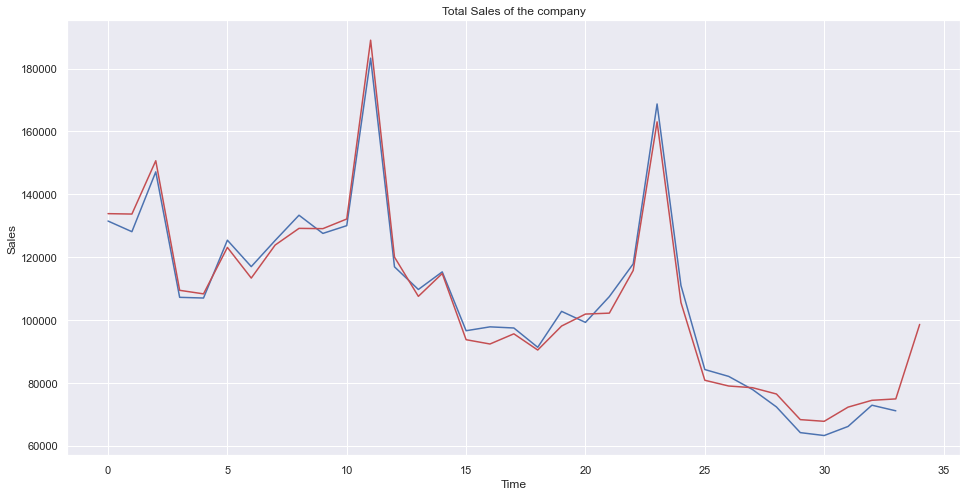

In [10]:
df=sales_train.groupby(["date_block_num"])["item_cnt_day"].sum()
df.astype("float")
plt.figure(figsize=(16,8))
plt.title("Total Sales of the company")
plt.xlabel("Time")
plt.ylabel("Sales")
plt.plot(df);
plt.plot(sum_x,"r", label="pred");

In [11]:
sales_train2=sales_train.copy()
sales_train2.drop(["date","item_price"], axis=1, inplace=True)
sales_train2=sales_train2.groupby(["date_block_num","shop_id","item_id"]).sum()
sales_train2=sales_train2.pivot_table(index=["shop_id","item_id"], columns="date_block_num", values="item_cnt_day", fill_value=0)
sales_train2.reset_index(inplace=True)
sales_train2

date_block_num,shop_id,item_id,0,1,2,3,4,5,6,7,...,24,25,26,27,28,29,30,31,32,33
0,0,30,0,31,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,31,0,11,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,32,6,10,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,33,3,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,35,1,14,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424119,59,22154,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
424120,59,22155,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
424121,59,22162,0,0,0,0,0,0,0,0,...,0,9,4,1,1,0,0,1,0,0
424122,59,22164,0,0,0,0,0,0,0,0,...,0,2,1,2,0,0,1,0,0,0


In [12]:
x1=sales_train2.values
x2=sales_train2.keys()


#ショップが出てくる回数
shop_num_list=[0*i for i in range(60)]

for i in range(424124):
    for j in range(60):
        shop_num_list[j]+=np.where(x1[i][0]==j,1,0)
        


In [13]:
#各ショップで売れたアイテムの月ごとの総数
item_list_0=[0*i for i in range(34)]
item_list_1=[0*i for i in range(34)]
item_list_2=[0*i for i in range(34)]
item_list_3=[0*i for i in range(34)]
item_list_4=[0*i for i in range(34)]
item_list_5=[0*i for i in range(34)]
item_list_6=[0*i for i in range(34)]
item_list_7=[0*i for i in range(34)]
item_list_8=[0*i for i in range(34)]
item_list_9=[0*i for i in range(34)]
item_list_10=[0*i for i in range(34)]
item_list_11=[0*i for i in range(34)]
item_list_12=[0*i for i in range(34)]
item_list_13=[0*i for i in range(34)]
item_list_14=[0*i for i in range(34)]
item_list_15=[0*i for i in range(34)]
item_list_16=[0*i for i in range(34)]
item_list_17=[0*i for i in range(34)]
item_list_18=[0*i for i in range(34)]
item_list_19=[0*i for i in range(34)]
item_list_20=[0*i for i in range(34)]
item_list_21=[0*i for i in range(34)]
item_list_22=[0*i for i in range(34)]
item_list_23=[0*i for i in range(34)]
item_list_24=[0*i for i in range(34)]
item_list_25=[0*i for i in range(34)]
item_list_26=[0*i for i in range(34)]
item_list_27=[0*i for i in range(34)]
item_list_28=[0*i for i in range(34)]
item_list_29=[0*i for i in range(34)]
item_list_30=[0*i for i in range(34)]
item_list_31=[0*i for i in range(34)]
item_list_32=[0*i for i in range(34)]
item_list_33=[0*i for i in range(34)]
item_list_34=[0*i for i in range(34)]
item_list_35=[0*i for i in range(34)]
item_list_36=[0*i for i in range(34)]
item_list_37=[0*i for i in range(34)]
item_list_38=[0*i for i in range(34)]
item_list_39=[0*i for i in range(34)]
item_list_40=[0*i for i in range(34)]
item_list_41=[0*i for i in range(34)]
item_list_42=[0*i for i in range(34)]
item_list_43=[0*i for i in range(34)]
item_list_44=[0*i for i in range(34)]
item_list_45=[0*i for i in range(34)]
item_list_46=[0*i for i in range(34)]
item_list_47=[0*i for i in range(34)]
item_list_48=[0*i for i in range(34)]
item_list_49=[0*i for i in range(34)]
item_list_50=[0*i for i in range(34)]
item_list_51=[0*i for i in range(34)]
item_list_52=[0*i for i in range(34)]
item_list_53=[0*i for i in range(34)]
item_list_54=[0*i for i in range(34)]
item_list_55=[0*i for i in range(34)]
item_list_56=[0*i for i in range(34)]
item_list_57=[0*i for i in range(34)]
item_list_58=[0*i for i in range(34)]
item_list_59=[0*i for i in range(34)]

In [14]:
#shop0の合計
for i in range(34):
    for j in range(shop_num_list[0]):
        item_list_0[i]+=x1[j][i+2]
        
k=j+1        
#shop1の合計
for i in range(34):
    for j in range(shop_num_list[1]):
        j=k+j
        item_list_1[i]+=x1[j][i+2]
        
k=j+1         
#shop2の合計
for i in range(34):
    for j in range(shop_num_list[2]):
        j=k+j
        item_list_2[i]+=x1[j][i+2]

k=j+1  
#shop3の合計
for i in range(34):
    for j in range(shop_num_list[3]):
        j=k+j
        item_list_3[i]+=x1[j][i+2]

k=j+1  
#shop4の合計
for i in range(34):
    for j in range(shop_num_list[4]):
        j=k+j
        item_list_4[i]+=x1[j][i+2]

k=j+1  
#shop5の合計
for i in range(34):
    for j in range(shop_num_list[5]):
        j=k+j
        item_list_5[i]+=x1[j][i+2]

k=j+1  
#shop6の合計
for i in range(34):
    for j in range(shop_num_list[6]):
        j=k+j
        item_list_6[i]+=x1[j][i+2]

k=j+1          
#shop7の合計
for i in range(34):
    for j in range(shop_num_list[7]):
        j=k+j
        item_list_7[i]+=x1[j][i+2]

k=j+1          
#shop8の合計
for i in range(34):
    for j in range(shop_num_list[8]):
        j=k+j
        item_list_8[i]+=x1[j][i+2]
        
k=j+1  
#shop9の合計
for i in range(34):
    for j in range(shop_num_list[9]):
        j=k+j
        item_list_9[i]+=x1[j][i+2]


In [15]:
#shop10の合計
k=j+1
for i in range(34):
    for j in range(shop_num_list[10]):
        j=k+j
        item_list_10[i]+=x1[j][i+2]
        
k=j+1        
#shop11の合計
for i in range(34):
    for j in range(shop_num_list[11]):
        j=k+j
        item_list_11[i]+=x1[j][i+2]
        
k=j+1         
#shop12の合計
for i in range(34):
    for j in range(shop_num_list[12]):
        j=k+j
        item_list_12[i]+=x1[j][i+2]

k=j+1  
#shop13の合計
for i in range(34):
    for j in range(shop_num_list[13]):
        j=k+j
        item_list_13[i]+=x1[j][i+2]

k=j+1  
#shop14の合計
for i in range(34):
    for j in range(shop_num_list[14]):
        j=k+j
        item_list_14[i]+=x1[j][i+2]

k=j+1  
#shop15の合計
for i in range(34):
    for j in range(shop_num_list[15]):
        j=k+j
        item_list_15[i]+=x1[j][i+2]

k=j+1  
#shop16の合計
for i in range(34):
    for j in range(shop_num_list[16]):
        j=k+j
        item_list_16[i]+=x1[j][i+2]

k=j+1          
#shop17の合計
for i in range(34):
    for j in range(shop_num_list[17]):
        j=k+j
        item_list_17[i]+=x1[j][i+2]

k=j+1          
#shop18の合計
for i in range(34):
    for j in range(shop_num_list[18]):
        j=k+j
        item_list_18[i]+=x1[j][i+2]
        
k=j+1  
#shop19の合計
for i in range(34):
    for j in range(shop_num_list[19]):
        j=k+j
        item_list_19[i]+=x1[j][i+2]


In [16]:
#shop20の合計
k=j+1
for i in range(34):
    for j in range(shop_num_list[20]):
        j=k+j
        item_list_20[i]+=x1[j][i+2]
        
k=j+1        
#shop21の合計
for i in range(34):
    for j in range(shop_num_list[21]):
        j=k+j
        item_list_21[i]+=x1[j][i+2]
        
k=j+1         
#shop22の合計
for i in range(34):
    for j in range(shop_num_list[22]):
        j=k+j
        item_list_22[i]+=x1[j][i+2]

k=j+1  
#shop23の合計
for i in range(34):
    for j in range(shop_num_list[23]):
        j=k+j
        item_list_23[i]+=x1[j][i+2]

k=j+1  
#shop24の合計
for i in range(34):
    for j in range(shop_num_list[24]):
        j=k+j
        item_list_24[i]+=x1[j][i+2]

k=j+1  
#shop25の合計
for i in range(34):
    for j in range(shop_num_list[25]):
        j=k+j
        item_list_25[i]+=x1[j][i+2]

k=j+1  
#shop26の合計
for i in range(34):
    for j in range(shop_num_list[26]):
        j=k+j
        item_list_26[i]+=x1[j][i+2]

k=j+1          
#shop27の合計
for i in range(34):
    for j in range(shop_num_list[27]):
        j=k+j
        item_list_27[i]+=x1[j][i+2]

k=j+1          
#shop28の合計
for i in range(34):
    for j in range(shop_num_list[28]):
        j=k+j
        item_list_28[i]+=x1[j][i+2]
        
k=j+1  
#shop29の合計
for i in range(34):
    for j in range(shop_num_list[29]):
        j=k+j
        item_list_29[i]+=x1[j][i+2]


In [17]:
#shop30の合計
k=j+1
for i in range(34):
    for j in range(shop_num_list[30]):
        j=k+j
        item_list_30[i]+=x1[j][i+2]
        
k=j+1        
#shop31の合計
for i in range(34):
    for j in range(shop_num_list[31]):
        j=k+j
        item_list_31[i]+=x1[j][i+2]
        
k=j+1         
#shop32の合計
for i in range(34):
    for j in range(shop_num_list[32]):
        j=k+j
        item_list_32[i]+=x1[j][i+2]

k=j+1  
#shop33の合計
for i in range(34):
    for j in range(shop_num_list[33]):
        j=k+j
        item_list_33[i]+=x1[j][i+2]

k=j+1  
#shop34の合計
for i in range(34):
    for j in range(shop_num_list[34]):
        j=k+j
        item_list_34[i]+=x1[j][i+2]

k=j+1  
#shop35の合計
for i in range(34):
    for j in range(shop_num_list[35]):
        j=k+j
        item_list_35[i]+=x1[j][i+2]

k=j+1  
#shop36の合計
for i in range(34):
    for j in range(shop_num_list[36]):
        j=k+j
        item_list_36[i]+=x1[j][i+2]

k=j+1          
#shop37の合計
for i in range(34):
    for j in range(shop_num_list[37]):
        j=k+j
        item_list_37[i]+=x1[j][i+2]

k=j+1          
#shop38の合計
for i in range(34):
    for j in range(shop_num_list[38]):
        j=k+j
        item_list_38[i]+=x1[j][i+2]
        
k=j+1  
#shop39の合計
for i in range(34):
    for j in range(shop_num_list[39]):
        j=k+j
        item_list_39[i]+=x1[j][i+2]


In [18]:
#shop40の合計
k=j+1
for i in range(34):
    for j in range(shop_num_list[40]):
        j=k+j
        item_list_40[i]+=x1[j][i+2]
        
k=j+1        
#shop41の合計
for i in range(34):
    for j in range(shop_num_list[41]):
        j=k+j
        item_list_41[i]+=x1[j][i+2]
        
k=j+1         
#shop42の合計
for i in range(34):
    for j in range(shop_num_list[42]):
        j=k+j
        item_list_42[i]+=x1[j][i+2]

k=j+1  
#shop43の合計
for i in range(34):
    for j in range(shop_num_list[43]):
        j=k+j
        item_list_43[i]+=x1[j][i+2]

k=j+1  
#shop44の合計
for i in range(34):
    for j in range(shop_num_list[44]):
        j=k+j
        item_list_44[i]+=x1[j][i+2]

k=j+1  
#shop45の合計
for i in range(34):
    for j in range(shop_num_list[45]):
        j=k+j
        item_list_45[i]+=x1[j][i+2]

k=j+1  
#shop46の合計
for i in range(34):
    for j in range(shop_num_list[46]):
        j=k+j
        item_list_46[i]+=x1[j][i+2]

k=j+1          
#shop47の合計
for i in range(34):
    for j in range(shop_num_list[47]):
        j=k+j
        item_list_47[i]+=x1[j][i+2]

k=j+1          
#shop48の合計
for i in range(34):
    for j in range(shop_num_list[48]):
        j=k+j
        item_list_48[i]+=x1[j][i+2]
        
k=j+1  
#shop49の合計
for i in range(34):
    for j in range(shop_num_list[49]):
        j=k+j
        item_list_19[i]+=x1[j][i+2]


In [19]:
#shop50の合計
k=j+1
for i in range(34):
    for j in range(shop_num_list[50]):
        j=k+j
        item_list_50[i]+=x1[j][i+2]
        
k=j+1        
#shop51の合計
for i in range(34):
    for j in range(shop_num_list[51]):
        j=k+j
        item_list_51[i]+=x1[j][i+2]
        
k=j+1         
#shop52の合計
for i in range(34):
    for j in range(shop_num_list[52]):
        j=k+j
        item_list_52[i]+=x1[j][i+2]

k=j+1  
#shop53の合計
for i in range(34):
    for j in range(shop_num_list[53]):
        j=k+j
        item_list_53[i]+=x1[j][i+2]

k=j+1  
#shop54の合計
for i in range(34):
    for j in range(shop_num_list[54]):
        j=k+j
        item_list_54[i]+=x1[j][i+2]

k=j+1  
#shop55の合計
for i in range(34):
    for j in range(shop_num_list[55]):
        j=k+j
        item_list_55[i]+=x1[j][i+2]

k=j+1  
#shop56の合計
for i in range(34):
    for j in range(shop_num_list[56]):
        j=k+j
        item_list_56[i]+=x1[j][i+2]

k=j+1          
#shop57の合計
for i in range(34):
    for j in range(shop_num_list[57]):
        j=k+j
        item_list_57[i]+=x1[j][i+2]

k=j+1          
#shop58の合計
for i in range(34):
    for j in range(shop_num_list[58]):
        j=k+j
        item_list_58[i]+=x1[j][i+2]
        
k=j+1  
#shop59の合計
for i in range(34):
    for j in range(shop_num_list[59]):
        j=k+j
        item_list_59[i]+=x1[j][i+2]


In [21]:
item_0=pd.DataFrame(item_list_0)
item_1=pd.DataFrame(item_list_1)
item_2=pd.DataFrame(item_list_2)
item_3=pd.DataFrame(item_list_3)
item_4=pd.DataFrame(item_list_4)
item_5=pd.DataFrame(item_list_5)
item_6=pd.DataFrame(item_list_6)
item_7=pd.DataFrame(item_list_7)
item_8=pd.DataFrame(item_list_8)
item_9=pd.DataFrame(item_list_9)
item_10=pd.DataFrame(item_list_10)
item_11=pd.DataFrame(item_list_11)
item_12=pd.DataFrame(item_list_12)
item_13=pd.DataFrame(item_list_13)
item_14=pd.DataFrame(item_list_14)
item_15=pd.DataFrame(item_list_15)
item_16=pd.DataFrame(item_list_16)
item_17=pd.DataFrame(item_list_17)
item_18=pd.DataFrame(item_list_18)
item_19=pd.DataFrame(item_list_19)
item_20=pd.DataFrame(item_list_20)
item_21=pd.DataFrame(item_list_21)
item_22=pd.DataFrame(item_list_22)
item_23=pd.DataFrame(item_list_23)
item_24=pd.DataFrame(item_list_24)
item_25=pd.DataFrame(item_list_25)
item_26=pd.DataFrame(item_list_26)
item_27=pd.DataFrame(item_list_27)
item_28=pd.DataFrame(item_list_28)
item_29=pd.DataFrame(item_list_29)
item_30=pd.DataFrame(item_list_30)
item_31=pd.DataFrame(item_list_31)
item_32=pd.DataFrame(item_list_32)
item_33=pd.DataFrame(item_list_33)
item_34=pd.DataFrame(item_list_34)
item_35=pd.DataFrame(item_list_35)
item_36=pd.DataFrame(item_list_36)
item_37=pd.DataFrame(item_list_37)
item_38=pd.DataFrame(item_list_38)
item_39=pd.DataFrame(item_list_39)
item_40=pd.DataFrame(item_list_40)
item_41=pd.DataFrame(item_list_41)
item_42=pd.DataFrame(item_list_42)
item_43=pd.DataFrame(item_list_43)
item_44=pd.DataFrame(item_list_44)
item_45=pd.DataFrame(item_list_45)
item_46=pd.DataFrame(item_list_46)
item_47=pd.DataFrame(item_list_47)
item_48=pd.DataFrame(item_list_48)
item_49=pd.DataFrame(item_list_49)
item_50=pd.DataFrame(item_list_50)
item_51=pd.DataFrame(item_list_51)
item_52=pd.DataFrame(item_list_52)
item_53=pd.DataFrame(item_list_53)
item_54=pd.DataFrame(item_list_54)
item_55=pd.DataFrame(item_list_55)
item_56=pd.DataFrame(item_list_56)
item_57=pd.DataFrame(item_list_57)
item_58=pd.DataFrame(item_list_58)
item_59=pd.DataFrame(item_list_59)

In [22]:
y=pd.concat([item_0,item_1,item_2,item_3,item_4,item_5,item_6,item_7,item_8,item_9,
          item_10,item_11,item_12,item_13,item_14,item_15,item_16,item_17,item_18,item_19,
          item_20,item_21,item_22,item_23,item_24,item_25,item_26,item_27,item_28,item_29,
          item_30,item_31,item_32,item_33,item_34,item_35,item_36,item_37,item_38,item_39,
          item_40,item_41,item_42,item_43,item_44,item_45,item_46,item_47,item_48,item_49,
          item_50,item_51,item_52,item_53,item_54,item_55,item_56,item_57,item_58,item_59],axis=1)

ycol=[1*i for i in range(60)]
y.columns=ycol
y

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,5578,2947,1146,767,2114,0,3686,2495,1463,0,...,3406,2748,1812,2055,9386,0,3238,0,0,2017
1,6127,3364,488,798,2025,877,4007,2513,1156,0,...,3054,2284,1737,1906,8075,0,2655,0,0,1897
2,0,0,753,959,2060,1355,4519,2460,977,0,...,3610,2605,2034,2365,9488,0,3099,6586,3773,2028
3,0,0,583,647,285,1008,3168,1540,-1,0,...,2740,1945,1446,1515,6726,0,2153,5493,2831,1388
4,0,0,553,710,1211,1110,3022,1647,0,0,...,2839,2243,1482,1767,7006,852,2140,5233,2308,1374
5,0,0,832,784,1464,1393,3847,2085,0,0,...,3761,2200,1815,2125,8101,728,3105,5987,2972,1707
6,0,0,807,721,1378,1265,3360,2031,0,0,...,3235,2273,1616,1975,7225,795,3294,5827,3122,1747
7,0,0,875,890,1713,1510,3702,2397,0,0,...,3718,2142,1772,2367,7792,719,3311,5413,2863,2048
8,0,0,945,1026,1536,1298,4208,2599,0,0,...,3655,1903,2125,2440,7827,812,2829,5213,2735,2008
9,0,0,795,793,1482,1267,3675,2236,0,6526,...,3525,1809,1965,2245,6676,916,2375,5686,3022,1751


In [27]:
#平均と一番最近の月のアイテムの売れた数の比率
ratio1=[0*i for i in range(60)]

for i in range(60):
    ratio1[i]=x[i][34]/y[i][10]
    if ratio1[i]==float("inf") or ratio1[i]==float("-inf") or math.isnan(ratio1[i])==True:
        ratio1[i]=0

In [28]:
#予想した11月のアイテム数と一番最近の月のアイテム数の比率
ratio2=[0*i for i in range(60)]

for i in range(60):
    ratio2[i]=x[i][34]/y[i][22]
    if ratio2[i]==float("inf") or ratio2[i]==float("-inf") or math.isnan(ratio2[i])==True:
        ratio2[i]=0

In [29]:
sales_train2=sales_train.copy()
sales_train2.drop(["date","item_price"], axis=1, inplace=True)
#各月で売れたアイテムの数
sales_train2=sales_train2.groupby(["date_block_num","shop_id","item_id"]).sum()
sales_train2=sales_train2.pivot_table(index=["shop_id","item_id"], columns="date_block_num", values="item_cnt_day", fill_value=0)
sales_train2.reset_index(inplace=True)
sales_train2

date_block_num,shop_id,item_id,0,1,2,3,4,5,6,7,...,24,25,26,27,28,29,30,31,32,33
0,0,30,0,31,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,31,0,11,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,32,6,10,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,33,3,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,35,1,14,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424119,59,22154,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
424120,59,22155,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
424121,59,22162,0,0,0,0,0,0,0,0,...,0,9,4,1,1,0,0,1,0,0
424122,59,22164,0,0,0,0,0,0,0,0,...,0,2,1,2,0,0,1,0,0,0


In [30]:
x1=sales_train2.values
x2=sales_train2.keys()

item_list1=[0*i for i in range(424124)]
item_list2=item_list1

for i in range(424124):
        item_list1[i]+=x1[i][12]
        item_list2[i]+=x1[i][22]

In [35]:
z=pd.DataFrame(sales_train2)

for i in range(424124):
    for j in range(60):
        if sales_train2["shop_id"][i]==j:
            item_list1[i]=((item_list1[i])*ratio1[j])
            item_list2[i]=((item_list2[i])*ratio2[j])

In [36]:
shop_id=sales_train2.loc[:,"shop_id"]
item_id=sales_train2.loc[:,"item_id"]
df_x=pd.DataFrame(item_list1)
df_y=pd.DataFrame(item_list2)
df_z=pd.concat([df_x,df_y])

TypeError: object of type 'numpy.int64' has no len()

In [39]:
item_list2

[[],
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,